## Problem1

There are two datasets consisting of information for the connecting routes and flight halt. 
Create network analytics models on both the datasets separately and measure degree centrality,
degree of closeness centrality, and degree of in-between centrality.
Create a network using edge list matrix (directed only).

In [82]:
import pandas as pd
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt

In [83]:
connecting_routes = pd.read_csv("connecting_routes.csv",header=None)
connecting_routes.head()

,0,1,2,3,4,5,6,7,8
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [84]:
connecting_routes.drop([6],axis=1,inplace=True)

In [85]:
connecting_routes.head()

,0,1,2,3,4,5,7,8
0,2B,410,AER,2965,KZN,2990,0,CR2
1,2B,410,ASF,2966,KZN,2990,0,CR2
2,2B,410,ASF,2966,MRV,2962,0,CR2
3,2B,410,CEK,2968,KZN,2990,0,CR2
4,2B,410,CEK,2968,OVB,4078,0,CR2


In [86]:
connecting_routes.columns=['flights', 'ID', 'main Airport', 'main Airport ID', 'Destination','Destination  ID','haults','machinary']

In [87]:
connecting_routes.head()

,flights,ID,main Airport,main Airport ID,Destination,Destination ID,haults,machinary
0,2B,410,AER,2965,KZN,2990,0,CR2
1,2B,410,ASF,2966,KZN,2990,0,CR2
2,2B,410,ASF,2966,MRV,2962,0,CR2
3,2B,410,CEK,2968,KZN,2990,0,CR2
4,2B,410,CEK,2968,OVB,4078,0,CR2


In [88]:
g = nx.Graph()
g = nx.from_pandas_edgelist(connecting_routes, source = 'main Airport', target = 'Destination')
nx.info(g)

C:\Users\AANAND~1.ORA\AppData\Local\Temp/ipykernel_8092/4157299778.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(g)


'Graph with 3425 nodes and 19257 edges'

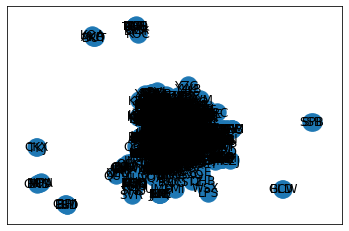

In [89]:
nx.draw_networkx(g)

In [90]:
g.nodes()

NodeView(('AER', 'KZN', 'ASF', 'MRV', 'CEK', 'OVB', 'DME', 'NBC', 'TGK', 'UUA', 'EGO', 'KGD', 'GYD', 'LED', 'SVX', 'NJC', 'NUX', 'BTK', 'IKT', 'HTA', 'KCK', 'ODO', 'UKX', 'ULK', 'YKS', 'MJZ', 'AYP', 'LIM', 'CUZ', 'PEM', 'HUU', 'IQT', 'PCL', 'TPP', 'ABJ', 'BOY', 'OUA', 'ACC', 'BKO', 'DKR', 'COO', 'LFW', 'NIM', 'BOG', 'GYE', 'UIO', 'CLO', 'SCY', 'OCC', 'BDS', 'ZRH', 'BOD', 'BRS', 'GVA', 'LPA', 'LCA', 'RMF', 'TFS', 'AJR', 'LYC', 'ARN', 'GEV', 'HAD', 'JKG', 'KRF', 'KSD', 'MHQ', 'OER', 'POR', 'TRF', 'VBY', 'VHM', 'VXO', 'HMV', 'KOK', 'TKU', 'OSL', 'ADQ', 'AOS', 'KKB', 'KLN', 'KOZ', 'OLH', 'KZB', 'SYB', 'KYK', 'ORI', 'KPR', 'BSO', 'MNL', 'BXU', 'CBO', 'CGY', 'CRM', 'DGT', 'DWC', 'GES', 'KLO', 'LGP', 'MPH', 'OZC', 'PPS', 'RXS', 'SUG', 'TUG', 'ZAM', 'AUX', 'PMW', 'BRA', 'BSB', 'SSA', 'OPS', 'RAO', 'CAC', 'GRU', 'CGB', 'GYN', 'CGR', 'DOU', 'GIG', 'UBA', 'UDI', 'VDC', 'PLU', 'SJP', 'BRL', 'ORD', 'STL', 'DEC', 'JBR', 'CGA', 'HYL', 'KTN', 'KTB', 'MTM', 'LOS', 'ROB', 'BCN', 'BJL', 'FNA', 'CKY', 'OX

In [91]:
import operator
b = nx.degree_centrality(g)  # Degree Centrality
sorted_b = sorted(b.items(), key=operator.itemgetter(1),reverse=True)
sorted_b

[('AMS', 0.07242990654205607),
 ('FRA', 0.07126168224299065),
 ('CDG', 0.07009345794392523),
 ('IST', 0.0689252336448598),
 ('ATL', 0.06337616822429906),
 ('PEK', 0.06045560747663551),
 ('ORD', 0.06016355140186915),
 ('MUC', 0.05607476635514018),
 ('DME', 0.055490654205607476),
 ('DXB', 0.054906542056074766),
 ('DFW', 0.054906542056074766),
 ('LHR', 0.05023364485981308),
 ('DEN', 0.04964953271028037),
 ('IAH', 0.049357476635514014),
 ('LGW', 0.04818925233644859),
 ('BCN', 0.04760514018691588),
 ('JFK', 0.04731308411214953),
 ('FCO', 0.04731308411214953),
 ('MAD', 0.04643691588785046),
 ('PVG', 0.04497663551401869),
 ('BRU', 0.04468457943925233),
 ('STN', 0.04468457943925233),
 ('EWR', 0.04468457943925233),
 ('CAN', 0.04380841121495327),
 ('LAX', 0.04351635514018691),
 ('MAN', 0.04322429906542056),
 ('DUS', 0.0429322429906542),
 ('YYZ', 0.0429322429906542),
 ('DUB', 0.04205607476635514),
 ('SVO', 0.04205607476635514),
 ('CLT', 0.04117990654205607),
 ('VIE', 0.04059579439252336),
 ('MIA'

In [92]:
# closeness centrality
closeness = nx.closeness_centrality(g)
sorted_closeness = sorted(closeness.items(), key=operator.itemgetter(1),reverse=True)
sorted_closeness

[('FRA', 0.39855981208881985),
 ('CDG', 0.39612242408122034),
 ('LHR', 0.39408318380280993),
 ('AMS', 0.3898413161993769),
 ('DXB', 0.38948068593462265),
 ('LAX', 0.38564563452743494),
 ('JFK', 0.3835814795538796),
 ('YYZ', 0.37913428320155523),
 ('IST', 0.37709683967337854),
 ('ORD', 0.37650670377404616),
 ('PEK', 0.3757925886380249),
 ('MUC', 0.37541562326823635),
 ('FCO', 0.3734178461155895),
 ('NRT', 0.37292171965927995),
 ('EWR', 0.372138876584092),
 ('DOH', 0.3715231603753162),
 ('ICN', 0.3704199903181147),
 ('ZRH', 0.3691209832287799),
 ('MAD', 0.3685555281718587),
 ('IAH', 0.367429799494122),
 ('HKG', 0.3667896081849741),
 ('IAD', 0.3659924993983067),
 ('DFW', 0.36358257469371946),
 ('ATL', 0.36307308094886453),
 ('PVG', 0.3619027583499105),
 ('AUH', 0.36046971018435536),
 ('SFO', 0.36046971018435536),
 ('CPH', 0.3571822875888247),
 ('SEA', 0.35623786059890183),
 ('SVO', 0.3558614867366737),
 ('BRU', 0.35414036084140643),
 ('DUS', 0.35339722714957683),
 ('LGW', 0.35273106838020

In [93]:
## Betweeness Centrality 
b = nx.betweenness_centrality(g) # Betweeness_Centrality
sorted_b = sorted(b.items(), key=operator.itemgetter(1),reverse=True)
sorted_b

[('ANC', 0.07248270694418972),
 ('LAX', 0.06520775890690773),
 ('CDG', 0.06193588499442267),
 ('DXB', 0.056487934217392066),
 ('FRA', 0.05108570902564666),
 ('PEK', 0.04956926032160239),
 ('AMS', 0.04926244723364709),
 ('SEA', 0.0481076330124328),
 ('ORD', 0.047939815908457736),
 ('YYZ', 0.04265081111920775),
 ('IST', 0.04173770614813279),
 ('GRU', 0.04038365335915741),
 ('LHR', 0.03720922626935324),
 ('NRT', 0.035934521323980076),
 ('SYD', 0.03266461272484683),
 ('BNE', 0.03182301879929596),
 ('SIN', 0.031149410101313373),
 ('DME', 0.029360421912011502),
 ('ATL', 0.029031607945401303),
 ('DFW', 0.028870743987937274),
 ('YUL', 0.028037951925789006),
 ('HKG', 0.027481931703755243),
 ('CPH', 0.026915863206305853),
 ('ICN', 0.02688842428345691),
 ('DEN', 0.026365352779184198),
 ('JFK', 0.024934006576947398),
 ('MIA', 0.02485706527925109),
 ('BOG', 0.0242162397908227),
 ('JNB', 0.022432273961952992),
 ('IAH', 0.022373738874024288),
 ('PVG', 0.022165087667730822),
 ('BKK', 0.022089565513560

In [94]:
## Eigen-Vector Centrality
evg = nx.eigenvector_centrality(g) # Eigen vector centrality
sorted_evg = sorted(evg.items(), key=operator.itemgetter(1),reverse=True)
sorted_evg

[('AMS', 0.16785098412044247),
 ('FRA', 0.1663918465401574),
 ('CDG', 0.15945060970185462),
 ('MUC', 0.1485129781505711),
 ('FCO', 0.13633049946557654),
 ('LHR', 0.13613831088577133),
 ('IST', 0.12932930994026728),
 ('BCN', 0.1281089923287042),
 ('ZRH', 0.12599398000428658),
 ('MAD', 0.12295294344636257),
 ('BRU', 0.12292644670255806),
 ('DUB', 0.11598953831908139),
 ('DUS', 0.11506220022204092),
 ('MAN', 0.11475497676348373),
 ('LGW', 0.11449325667584809),
 ('VIE', 0.11400170799535411),
 ('CPH', 0.10937578236841564),
 ('JFK', 0.10653565377715864),
 ('MXP', 0.10546259602316774),
 ('DXB', 0.10379806804172377),
 ('GVA', 0.10028999567481899),
 ('TXL', 0.09790307420859415),
 ('SVO', 0.09552945317011739),
 ('ARN', 0.0950129087495731),
 ('AGP', 0.0937790255504487),
 ('EWR', 0.09362446505222025),
 ('PRG', 0.09024836230754905),
 ('ORD', 0.08989132630441325),
 ('YYZ', 0.08900116184325259),
 ('LIS', 0.08856924477181967),
 ('ATH', 0.08660706879988687),
 ('HAM', 0.08637007221062402),
 ('PMI', 0.08

In [95]:
# cluster coefficient
cluster_coeff = nx.clustering(g)
sorted_cluster_coeff = sorted(cluster_coeff.items(), key=operator.itemgetter(1),reverse=True)
sorted_cluster_coeff

[('ULK', 1.0),
 ('PEM', 1.0),
 ('PCL', 1.0),
 ('TPP', 1.0),
 ('BOY', 1.0),
 ('JKG', 1.0),
 ('KRF', 1.0),
 ('KSD', 1.0),
 ('MHQ', 1.0),
 ('KOK', 1.0),
 ('KOZ', 1.0),
 ('ORI', 1.0),
 ('BXU', 1.0),
 ('DGT', 1.0),
 ('GES', 1.0),
 ('LGP', 1.0),
 ('MPH', 1.0),
 ('OZC', 1.0),
 ('SUG', 1.0),
 ('BRA', 1.0),
 ('OPS', 1.0),
 ('BRL', 1.0),
 ('DEC', 1.0),
 ('HYL', 1.0),
 ('KTB', 1.0),
 ('YTQ', 1.0),
 ('LWB', 1.0),
 ('MCN', 1.0),
 ('GHB', 1.0),
 ('LSP', 1.0),
 ('BHK', 1.0),
 ('KSQ', 1.0),
 ('NVI', 1.0),
 ('SFG', 1.0),
 ('PZI', 1.0),
 ('JIQ', 1.0),
 ('JZH', 1.0),
 ('LUM', 1.0),
 ('LZY', 1.0),
 ('XIC', 1.0),
 ('DNH', 1.0),
 ('GXH', 1.0),
 ('ZHY', 1.0),
 ('TCT', 1.0),
 ('TLJ', 1.0),
 ('SPD', 1.0),
 ('RJH', 1.0),
 ('CEN', 1.0),
 ('CJS', 1.0),
 ('CME', 1.0),
 ('CZM', 1.0),
 ('HUX', 1.0),
 ('TAM', 1.0),
 ('TGZ', 1.0),
 ('TRC', 1.0),
 ('CXF', 1.0),
 ('CEM', 1.0),
 ('IRC', 1.0),
 ('CIK', 1.0),
 ('MLY', 1.0),
 ('SVS', 1.0),
 ('WBQ', 1.0),
 ('MNT', 1.0),
 ('ATT', 1.0),
 ('KUK', 1.0),
 ('EEK', 1.0),
 ('GNU', 1

In [96]:
# Average clustering
cc = nx.average_clustering(g) 
cc

0.4870933566129556

In [97]:
flight_hault = pd.read_csv("flight_hault.csv",header=None)
flight_hault

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby
...,...,...,...,...,...,...,...,...,...,...,...,...
8102,9537,Mansons Landing Water Aerodrome,Mansons Landing,Canada,YMU,\N,50.066667,-124.983333,0,-8.0,A,America/Vancouver
8103,9538,Port McNeill Airport,Port McNeill,Canada,YMP,\N,50.575556,-127.028611,225,-8.0,A,America/Vancouver
8104,9539,Sullivan Bay Water Aerodrome,Sullivan Bay,Canada,YTG,\N,50.883333,-126.833333,0,-8.0,A,America/Vancouver
8105,9540,Deer Harbor Seaplane,Deer Harbor,United States,DHB,\N,48.618397,-123.005960,0,-8.0,A,America/Los_Angeles


In [98]:
flight_hault.columns=["ID","Name","City","Country","IATA_FAA","ICAO","Latitude","Longitude","Altitude","Time","DST","Tz database time"]

In [99]:
flight_hault

,ID,Name,City,Country,IATA_FAA,ICAO,Latitude,Longitude,Altitude,Time,DST,Tz database time
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby
...,...,...,...,...,...,...,...,...,...,...,...,...
8102,9537,Mansons Landing Water Aerodrome,Mansons Landing,Canada,YMU,\N,50.066667,-124.983333,0,-8.0,A,America/Vancouver
8103,9538,Port McNeill Airport,Port McNeill,Canada,YMP,\N,50.575556,-127.028611,225,-8.0,A,America/Vancouver
8104,9539,Sullivan Bay Water Aerodrome,Sullivan Bay,Canada,YTG,\N,50.883333,-126.833333,0,-8.0,A,America/Vancouver
8105,9540,Deer Harbor Seaplane,Deer Harbor,United States,DHB,\N,48.618397,-123.005960,0,-8.0,A,America/Los_Angeles


In [100]:
G = flight_hault.iloc[:, 1:11]
G

,Name,City,Country,IATA_FAA,ICAO,Latitude,Longitude,Altitude,Time,DST
0,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U
1,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U
2,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U
3,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U
4,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U
...,...,...,...,...,...,...,...,...,...,...
8102,Mansons Landing Water Aerodrome,Mansons Landing,Canada,YMU,\N,50.066667,-124.983333,0,-8.0,A
8103,Port McNeill Airport,Port McNeill,Canada,YMP,\N,50.575556,-127.028611,225,-8.0,A
8104,Sullivan Bay Water Aerodrome,Sullivan Bay,Canada,YTG,\N,50.883333,-126.833333,0,-8.0,A
8105,Deer Harbor Seaplane,Deer Harbor,United States,DHB,\N,48.618397,-123.005960,0,-8.0,A


In [101]:
## Betweeness Centrality 
b = nx.betweenness_centrality(g) # Betweeness_Centrality
sorted_b = sorted(b.items(), key=operator.itemgetter(1),reverse=True)
sorted_b

[('ANC', 0.07248270694418972),
 ('LAX', 0.06520775890690773),
 ('CDG', 0.06193588499442267),
 ('DXB', 0.056487934217392066),
 ('FRA', 0.05108570902564666),
 ('PEK', 0.04956926032160239),
 ('AMS', 0.04926244723364709),
 ('SEA', 0.0481076330124328),
 ('ORD', 0.047939815908457736),
 ('YYZ', 0.04265081111920775),
 ('IST', 0.04173770614813279),
 ('GRU', 0.04038365335915741),
 ('LHR', 0.03720922626935324),
 ('NRT', 0.035934521323980076),
 ('SYD', 0.03266461272484683),
 ('BNE', 0.03182301879929596),
 ('SIN', 0.031149410101313373),
 ('DME', 0.029360421912011502),
 ('ATL', 0.029031607945401303),
 ('DFW', 0.028870743987937274),
 ('YUL', 0.028037951925789006),
 ('HKG', 0.027481931703755243),
 ('CPH', 0.026915863206305853),
 ('ICN', 0.02688842428345691),
 ('DEN', 0.026365352779184198),
 ('JFK', 0.024934006576947398),
 ('MIA', 0.02485706527925109),
 ('BOG', 0.0242162397908227),
 ('JNB', 0.022432273961952992),
 ('IAH', 0.022373738874024288),
 ('PVG', 0.022165087667730822),
 ('BKK', 0.022089565513560

In [131]:
# The following 10 halts have the highest interconnectivity
halt=[]
for a in sorted_b:
    halt.append(a[0])
halt[0:10]

['ANC', 'LAX', 'CDG', 'DXB', 'FRA', 'PEK', 'AMS', 'SEA', 'ORD', 'YYZ']

In [132]:
#Get details of these airports from flight_hault
G[G['IATA_FAA'].isin(halt[0:10])]

,Name,City,Country,IATA_FAA,ICAO,Latitude,Longitude,Altitude,Time,DST
191,Lester B Pearson Intl,Toronto,Canada,YYZ,CYYZ,43.677223,-79.630556,569,-5.0,A
337,Frankfurt Main,Frankfurt,Germany,FRA,EDDF,50.026421,8.543125,364,1.0,E
575,Schiphol,Amsterdam,Netherlands,AMS,EHAM,52.308613,4.763889,-11,1.0,E
1358,Charles De Gaulle,Paris,France,CDG,LFPG,49.012779,2.550000,392,1.0,E
2137,Dubai Intl,Dubai,United Arab Emirates,DXB,OMDB,25.252778,55.364444,62,4.0,U
3268,Capital Intl,Beijing,China,PEK,ZBAA,40.080111,116.584556,116,8.0,U
3385,Los Angeles Intl,Los Angeles,United States,LAX,KLAX,33.942536,-118.408075,126,-8.0,A
3478,Seattle Tacoma Intl,Seattle,United States,SEA,KSEA,47.449000,-122.309306,433,-8.0,A
3675,Ted Stevens Anchorage Intl,Anchorage,United States,ANC,PANC,61.174361,-149.996361,152,-9.0,A
3731,Chicago Ohare Intl,Chicago,United States,ORD,KORD,41.978603,-87.904842,668,-6.0,A


In [147]:
G = G.set_index('IATA_FAA')
G


,Name,City,Country,ICAO,Latitude,Longitude,Altitude,Time,DST
IATA_FAA,,,,,,,,,
GKA,Goroka,Goroka,Papua New Guinea,AYGA,-6.081689,145.391881,5282,10.0,U
MAG,Madang,Madang,Papua New Guinea,AYMD,-5.207083,145.788700,20,10.0,U
HGU,Mount Hagen,Mount Hagen,Papua New Guinea,AYMH,-5.826789,144.295861,5388,10.0,U
LAE,Nadzab,Nadzab,Papua New Guinea,AYNZ,-6.569828,146.726242,239,10.0,U
POM,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,AYPY,-9.443383,147.220050,146,10.0,U
...,...,...,...,...,...,...,...,...,...
NaN,Mansons Landing Water Aerodrome,Mansons Landing,Canada,\N,50.066667,-124.983333,0,-8.0,A
NaN,Port McNeill Airport,Port McNeill,Canada,\N,50.575556,-127.028611,225,-8.0,A
NaN,Sullivan Bay Water Aerodrome,Sullivan Bay,Canada,\N,50.883333,-126.833333,0,-8.0,A


In [149]:
G.loc[halt[0:10]]

,Name,City,Country,ICAO,Latitude,Longitude,Altitude,Time,DST
IATA_FAA,,,,,,,,,
ANC,Ted Stevens Anchorage Intl,Anchorage,United States,PANC,61.174361,-149.996361,152,-9.0,A
LAX,Los Angeles Intl,Los Angeles,United States,KLAX,33.942536,-118.408075,126,-8.0,A
CDG,Charles De Gaulle,Paris,France,LFPG,49.012779,2.550000,392,1.0,E
DXB,Dubai Intl,Dubai,United Arab Emirates,OMDB,25.252778,55.364444,62,4.0,U
FRA,Frankfurt Main,Frankfurt,Germany,EDDF,50.026421,8.543125,364,1.0,E
PEK,Capital Intl,Beijing,China,ZBAA,40.080111,116.584556,116,8.0,U
AMS,Schiphol,Amsterdam,Netherlands,EHAM,52.308613,4.763889,-11,1.0,E
SEA,Seattle Tacoma Intl,Seattle,United States,KSEA,47.449000,-122.309306,433,-8.0,A
ORD,Chicago Ohare Intl,Chicago,United States,KORD,41.978603,-87.904842,668,-6.0,A


The above 10 halts have the highest traffic (interconnectivity)